The goal of this script is to create a few charts and visualizations analyzing our tweets

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [5]:
DATA_DIR = "../../data/"

In [6]:
tweets = pd.read_csv(DATA_DIR + "tweet_scrape_2020_11_25.csv")

### Preprocessing text

Use Porter stemmer + lemmatization: https://www.tutorialspoint.com/python_data_science/python_stemming_and_lemmatization.htm

Stemming: 

In [19]:
porter_stemmer = PorterStemmer()

In [24]:
tweets["stemmed_text"] = [porter_stemmer.stem(text) for text in tweets["text"]]

Lemmatization

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
tweets["stemmed_lemmatized_text"] = [wordnet_lemmatizer.lemmatize(text) for text in tweets["stemmed_text"]]

In [28]:
tweets["stemmed_lemmatized_text"][0]

'as a teacher i urge people to read this thread'

Remove links, @ mentions

In [133]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

In [134]:
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [137]:
tweets["cleaned_text"] = [remove_links(tweet) for tweet in tweets["stemmed_lemmatized_text"]]
tweets["cleaned_text"] = [remove_users(tweet) for tweet in tweets["cleaned_text"]]

### Let's separate our tweets by depressed/anxious vs. not (using hard-coded dictionary of words), and see if we can do some preliminary analysis seeing if there's a difference in the tweets

In [138]:
depressed_count = 0

In [153]:
depression_words_list = ["depression", "dejected", "desperate", "sadness", "anxiety", 
                         "unhappy", "gloomy", "hopeless", "worry", "woeful", "upset", 
                         "sorry", "misery", "mental", "stress", "fear", "afraid"]


In [154]:
depression_words_list = [porter_stemmer.stem(text) for text in depression_words_list]

In [155]:
depression_words_list = [wordnet_lemmatizer.lemmatize(text) for text in depression_words_list]

In [156]:
depression_words_list

['depress',
 'deject',
 'desper',
 'sad',
 'anxieti',
 'unhappi',
 'gloomi',
 'hopeless',
 'worri',
 'woeful',
 'upset',
 'sorri',
 'miseri',
 'mental',
 'stress',
 'fear',
 'afraid']

In [157]:
bool_arr_has_depressed_word = []

In [158]:
bool_word_depressed = False

In [159]:
for tweet in tweets["cleaned_text"]:
    for word in depression_words_list:
        if word in tweet:
            depressed_count = depressed_count + 1
            bool_arr_has_depressed_word.append(1)
            bool_word_depressed=True
            break
    if bool_word_depressed:
        bool_word_depressed=False
        continue
    bool_arr_has_depressed_word.append(0)

In [160]:
sum(bool_arr_has_depressed_word)

294

In [161]:
tweets["is_depressed"] = bool_arr_has_depressed_word

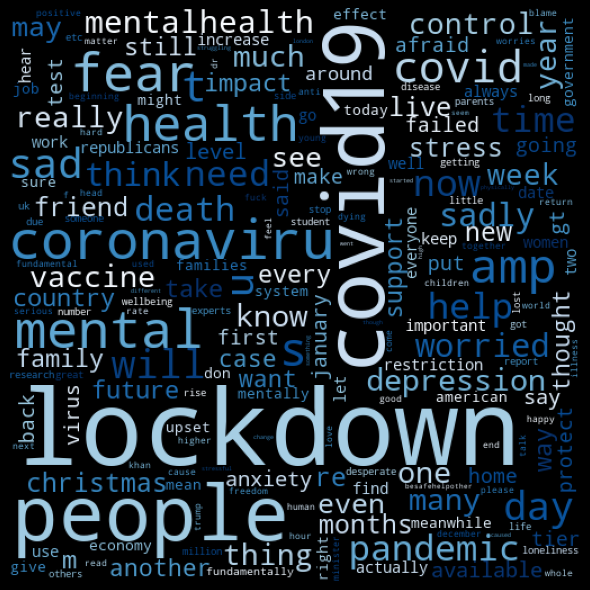

In [162]:
# for depressed tweets
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(" ".join(list(tweets[tweets["is_depressed"]==1]["cleaned_text"])))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

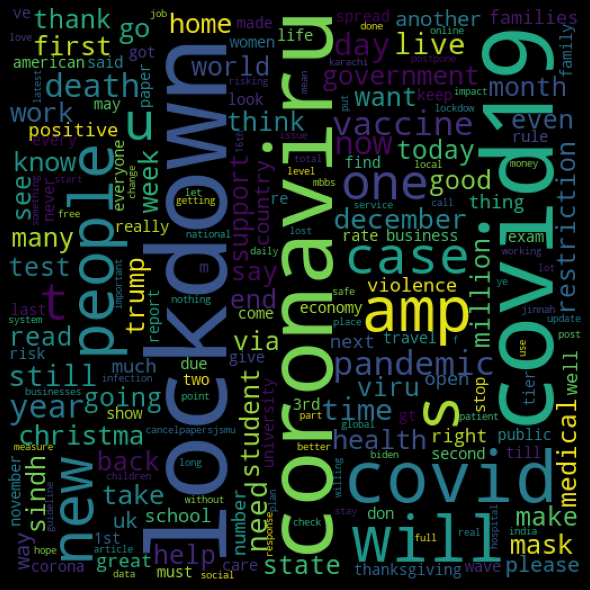

In [163]:
# for non-depressed tweets
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(list(tweets[tweets["is_depressed"]==0]["cleaned_text"])))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### When were the tweets posted?

In [108]:
tweets.head()

created_at  \
0  2020-11-25 11:33:12+00:00   
1  2020-11-25 11:33:12+00:00   
2  2020-11-25 11:33:12+00:00   
3  2020-11-25 11:33:13+00:00   
4  2020-11-25 11:33:13+00:00   

                                                text             tweet_id  \
0     As a teacher I urge people to read this thread  1331561569545809920   
1  @Yfm @LuckyStarSA #SouthAfricaRemix \nDuring t...  1331561569940025345   
2  Nice walk after school run! \n#lockdown #annua...  1331561571798163457   
3  Plans for the first weekend after lockdown: Ha...  1331561574268612609   
4  @DanKennett @nnniner The first lockdown I agre...  1331561574209871872   

  user_screen_name                user_name              user_id  \
0       teacherken        Kenneth Bernstein             30686025   
1    Tshego_Pretty  Tshegofatso _Mashiloane  1260439985246928898   
2     AshPeelLowes      Ashleigh Peel-Lowes            755865500   
3    ReinaaNatasha                     Tash            322261324   
4         Dijkinho                 Dijkinho            549771075   

   user_followers_count  user_following_count  user_statuses_count  \
0                  4879                  1926                51805   
1                   352                  1187                 2438   
2                    75                   198                  954   
3                  1743                   743               222597   
4                  2506                   316                38403   

   user_likes_given_count  ... tweet_retweet_count  tweet_favorite_count  \
0                     232  ...                   0                     0   
1                    1562  ...                   0                     0   
2                     521  ...                   0                     0   
3                   51825  ...                   0                     0   
4                    1328  ...                   0                     0   

  tweet_reply_count                              tweet_hashtags  \
0                 0                                          []   
1                 0                        ['SouthAfricaRemix']   
2                 0  ['lockdown', 'annualleave', 'whittledene']   
3                 0                                          []   
4                 0                                          []   

                                          tweet_urls  \
0                                                 []   
1  ['https://twitter.com/i/web/status/13315615699...   
2                                                 []   
3                                                 []   
4  ['https://twitter.com/i/web/status/13315615742...   

                                         tweet_media  \
0                                                NaN   
1                                                NaN   
2  ['http://pbs.twimg.com/media/EnqoLuyW8AM0_Jv.j...   
3                                                NaN   
4                                                NaN   

                                      tokenized_text  \
0  [As, a, teacher, I, urge, people, to, read, th...   
1  [@Yfm, @LuckyStarSA, #SouthAfricaRemix, \nDuri...   
2  [Nice, walk, after, school, run!, \n#lockdown,...   
3  [Plans, for, the, first, weekend, after, lockd...   
4  [@DanKennett, @nnniner, The, first, lockdown, ...   

                                        stemmed_text  \
0     as a teacher i urge people to read this thread   
1  @yfm @luckystarsa #southafricaremix \nduring t...   
2  nice walk after school run! \n#lockdown #annua...   
3  plans for the first weekend after lockdown: ha...   
4  @dankennett @nnniner the first lockdown i agre...   

                             stemmed_lemmatized_text is_depressed  
0     as a teacher i urge people to read this thread            0  
1  @yfm @luckystarsa #southafricaremix \nduring t...            0  
2  nice walk after school run! \n#lockdown #annua...            0  
3  plans for the first weekend after lockdown: ha...

In [115]:
# e.g., 2020-11-25 11:33:12+00:00 --> 2020-11-25 11:33:12
tweets["tweet_time_str"] = [time.split('+')[0] for time in tweets["created_at"]] 


In [120]:
# turn into datetime
tweets["tweet_time_datetime"] = [datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in tweets["tweet_time_str"]]

In [122]:
# get hour of posting
tweets["hour_posted"] = [date.strftime("%m") for date in tweets["tweet_time_datetime"]]

In [123]:
tweets["hour_posted"].value_counts() 
# they were posted at the same time, because this is when I scraped them... but will do later...

11    8178
Name: hour_posted, dtype: int64

#### Is there a difference in the favorites or retweets on the tweet? (tweet_favorite_count, tweet_retweet_count)

In [125]:
tweets.head()

created_at  \
0  2020-11-25 11:33:12+00:00   
1  2020-11-25 11:33:12+00:00   
2  2020-11-25 11:33:12+00:00   
3  2020-11-25 11:33:13+00:00   
4  2020-11-25 11:33:13+00:00   

                                                text             tweet_id  \
0     As a teacher I urge people to read this thread  1331561569545809920   
1  @Yfm @LuckyStarSA #SouthAfricaRemix \nDuring t...  1331561569940025345   
2  Nice walk after school run! \n#lockdown #annua...  1331561571798163457   
3  Plans for the first weekend after lockdown: Ha...  1331561574268612609   
4  @DanKennett @nnniner The first lockdown I agre...  1331561574209871872   

  user_screen_name                user_name              user_id  \
0       teacherken        Kenneth Bernstein             30686025   
1    Tshego_Pretty  Tshegofatso _Mashiloane  1260439985246928898   
2     AshPeelLowes      Ashleigh Peel-Lowes            755865500   
3    ReinaaNatasha                     Tash            322261324   
4         Dijkinho                 Dijkinho            549771075   

   user_followers_count  user_following_count  user_statuses_count  \
0                  4879                  1926                51805   
1                   352                  1187                 2438   
2                    75                   198                  954   
3                  1743                   743               222597   
4                  2506                   316                38403   

   user_likes_given_count  ...                              tweet_hashtags  \
0                     232  ...                                          []   
1                    1562  ...                        ['SouthAfricaRemix']   
2                     521  ...  ['lockdown', 'annualleave', 'whittledene']   
3                   51825  ...                                          []   
4                    1328  ...                                          []   

                                          tweet_urls  \
0                                                 []   
1  ['https://twitter.com/i/web/status/13315615699...   
2                                                 []   
3                                                 []   
4  ['https://twitter.com/i/web/status/13315615742...   

                                         tweet_media  \
0                                                NaN   
1                                                NaN   
2  ['http://pbs.twimg.com/media/EnqoLuyW8AM0_Jv.j...   
3                                                NaN   
4                                                NaN   

                                      tokenized_text  \
0  [As, a, teacher, I, urge, people, to, read, th...   
1  [@Yfm, @LuckyStarSA, #SouthAfricaRemix, \nDuri...   
2  [Nice, walk, after, school, run!, \n#lockdown,...   
3  [Plans, for, the, first, weekend, after, lockd...   
4  [@DanKennett, @nnniner, The, first, lockdown, ...   

                                        stemmed_text  \
0     as a teacher i urge people to read this thread   
1  @yfm @luckystarsa #southafricaremix \nduring t...   
2  nice walk after school run! \n#lockdown #annua...   
3  plans for the first weekend after lockdown: ha...   
4  @dankennett @nnniner the first lockdown i agre...   

                             stemmed_lemmatized_text  is_depressed  \
0     as a teacher i urge people to read this thread             0   
1  @yfm @luckystarsa #southafricaremix \nduring t...             0   
2  nice walk after school run! \n#lockdown #annua...             0   
3  plans for the first weekend after lockdown: ha...             0   
4  @dankennett @nnniner the first lockdown i agre...             0   

        tweet_time_str tweet_time_datetime hour_posted  
0  2020-11-25 11:33:12 2020-11-25 11:33:12          11  
1  2020-11-25 11:33:12 2020-11-25 11:33:12          11  
2  2020-11-25 11:33:12 2020-11-25 11:33:12          11  
3  2020-11-25 11:33:13 2020-11-25 11:33:13          11  
4  2020-1

In [130]:
tweets["tweet_favorite_count"].value_counts()

0    8178
Name: tweet_favorite_count, dtype: int64

In [132]:
np.mean(tweets["user_followers_count"])

3841.638420151626

In [164]:
?plt.boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa085324fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa085360400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0853247f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa0853608d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa085332320>,
 'means': []}

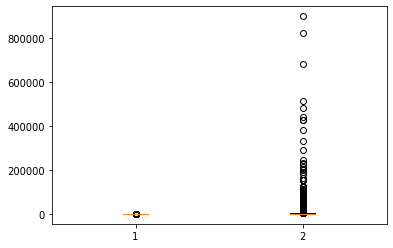

In [131]:
# looking at the number of favorites
plt.boxplot(tweets[["is_depressed", "user_followers_count"]])

### Now, let's use an ML classifier to detect emotion in the tweets, and separate sad tweets

Need to use a pretrained classifier (e.g., BERT), trained on "depression" tweets

### Let's create topic models for our tweets, using LDA

Tokenize text

In [10]:
tweets["tokenized_text"] = [tweet.split(sep=' ') for tweet in tweets["text"]]

Remove stopwords

False

In [ ]:
num